In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# But
Il s'agit du troisième notebook sur les techniques d'intégration de fonction à 1 dimension. Dans celui-ci, tu vas mettre en oeuvre la méthode dites **de Gauss-Legendre**. Celle-ci fait partie du champ des "quadratures" qui approxime l'intégrale selon une somme pondérée comme:
$$
\int_a^b f(x) dx = \sum_{i=0}^{n-1} w_i f(x_i) 
$$
avec $x_i$ des **noeuds** auxquels est évaluée la fonction $f$, $y_i=f(x_i)$ et $w_i$ des **poids**. 

Notes que la méthode des trapèzes étudiée dans le second notebook ainsi d'ailleurs que la méthode des rectangles, s'apparante à ce type de d'approximation. Cependant tandis que ces dernières échantillonnent la fonction $f$ à des noeuds régulièrement espacés, pour la méthode de Gauss-Legendre c'est différent. 

# Polynômes de Legendre
Je ne vais pas faire de démonstration, et je donne le résultat suivant dans le cas d'une intégration sur l'intervalle [-1,1] (nous verrons comme l'étendre à l'intervalle [a,b]):
1. les $x_i$ sont les racines du polynôme de Legendre de rang $n$, qui est de degré $n$, donc 
$$
P_n(x_i) = 0 \qquad i=0,\dots,n-1
$$
2. les $w_i$ ont l'expression suivante:
$$
w_i = \frac{2(1-x_i^2)}{[n P_{n-1}\ (x_i)]^2}\qquad i=0,\dots,n-1
$$

Il faut donc pour **$n$ fixé** que l'on nomme **l'ordre de la quadrature**, pouvoir calculer $P_n(x)$ pour trouver les racines et évaluer $P_{n-1}(x_i)$. Il se trouve que les polynômes de Legendre font partie d'une classe particulière des polynômes appelée: la classe des **polynômes orthogonaux**. Ils satisfont la relation d'orthogonalité (cf. produit scalaire dans l'espace vectoriel des polynômes) suivante:
$$
\int_{-1}^1 P_n(x) P_m(x) dx = \frac{2}{2n+1} \delta_{nm}
$$
avec $\delta_{ij}$ le symoble de **Kronecker** qui est égale à 1 si $i=j$ et 0 sinon. Les polynômes de Legendre satisfont alors une relation de récurrence 
$$
P_n(x) = \frac{1}{n} \left[(2n-1)x P_{n-1}(x)-(n-1)P_{n-2}\ (x) \right]
$$
avec $P_0(x)=1$ et $P_1(x) = x$ pour initialiser la récurrence.

**Exercice**: Ecris une fonction nommée "legendre(n,x)" qui a pour arguments
* n: l'odre du polynôme $P_n$ 
* x: la valeur (ou le tableau de valeurs) à laquelle on veut évaluer $P_n(x)$

Tu utilises la formule de récurrence. Comme par ailleurs, cette récurrence donne accés à $P_{n-1}\ (x)$, tu feras retourner (par un "return") un **dictionnaire** python dont la structure sera la suivante:

    {'pn': valeur de P_n(x), 'pnm1': valeur de P_{n-1}(x)}


Nb. un dictionnaire est un ensemble de entre "{ }" qui comporte une suite de 
"clé:valeur" séparée par des ",".

In [175]:
# %load ./solutions/exo_legendre.py

Voyons par exemple les graphes de $P_5(x)$ et $P_4(x)$ qui nous servirons pour établir la quadrature de Gauss-Legendre d'ordre 5.

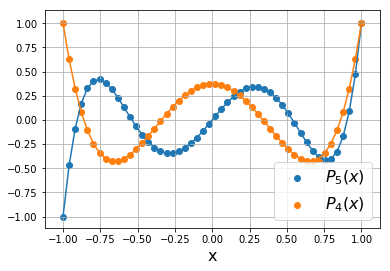

In [27]:
x=np.linspace(-1,1,50)
y = legendre(5,x)        # y est un dictionnaire avec les cles 'pn' et 'pnm1'
plt.scatter(x,y['pn'],label='$P_5(x)$')
plt.plot(x,y['pn'])
plt.scatter(x,y['pnm1'],label='$P_4(x)$')
plt.plot(x,y['pnm1'])
plt.xlabel('x',fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()

On remarque que $P_4$ et **pair**, alors que $P_5$ est impair. On peut montrer par récurrence que cela se généralise:
$$
P_{n}(-x) = (-1)^n\ P_{n}(x)
$$
Cela nous sert pour déterminer les racines des polynômes. En particulier, on montre facilement que $P_5(0)=0$ (comme pour tous les polynômes impairs) et il suffit de chercher 2 racines dans l'intervalle ]0,1[ pour connaître les racines de $P_5$ (ça se généralise à $p$ racines non nulles sur ]0,1[ pour $P_{2p+1}\ $ ). 

# Recherche des racines par dichotomie
Il nous faut donc trouver les racines de $P_5(x)$, on les note ${x_0,x_1,x_2,x_3,x_4}$. On sait que:
$$
x_0 = -x_4, \quad x_1 = -x_3, \quad x_2 = 0
$$
Cherchons donc $x_3$ et $x_4$ dans l'intervalle ]0,1[.

D'aprés le graphe de $P_5(x)$, on se doute que l'on peut "séparer" les deux racines en les encadrant selon :
$$
0.4 < x_3 < 0.6 \quad et \quad 0.75 < x_4 < 1.0
$$
On va donc mettre en oeuvre la recherche par dichotomie.

**Exercice**: 

Ecris une fonction "root(f,a,b,eps=1e-13)" qui prend en argument:
* f: la fonction dont on cherche la racine dans l'intervale [a,b]
* a: borne inf de l'intervale de recherche
* b: borne sup de l'intervale de recherche
* eps: l'erreur absolue entre deux estimations conscécutives de la racine

Tu mets en oeuvre la méthode de recherche par dychotomie.


In [177]:
# %load ./solutions/exo_root.py

In [30]:
def leg5(x):
    return legendre(5,x)['pn']

Donc maintenant estimons les valeurs de $x_3$ et $x_4$, et affectons au tableau "xroot" les racines de $P_5(x)$ qui sont les noeuds de la quadrature de Gauss-Legendre

In [50]:
x3 = root(leg5,0.4,0.6)
x4 = root(leg5,0.75,1.0)
xroot=np.array([-x4,-x3,0.,x3,x4])

In [52]:
#Verification de P_5(xroot) = 0
leg5(xroot)

array([-1.14930288e-13,  6.76791956e-14,  0.00000000e+00, -6.76791956e-14,
        1.14930288e-13])

Passons à l'estimation des poids. On va se servir de la fonction legendre qui P_5 er P_4 qui va retourner un dictionnaire python avec deux clés ('pn' et 'pnm1') dont cette fois les valeurs associées sont des tableaux numpy constitués de $[P_5(x0),\dots,P_5(x_4)]$ et de $[P_4(x0),\dots,P_4(x_4)]$ 

In [56]:
leg54_vals= legendre(5,xroot)
print(leg54_vals)

{'pn': array([-1.14930288e-13,  6.76791956e-14,  0.00000000e+00, -6.76791956e-14,
        1.14930288e-13]), 'pnm1': array([ 0.24573546, -0.34450089,  0.375     , -0.34450089,  0.24573546])}


In [57]:
p4vals = leg54_vals['pnm1']

Comme les poids $w_i$ sont données par 
$$
w_i = \frac{2(1-x_i^2)}{[n P_{n-1}\ (x_i)]^2}\qquad i=0,\dots,n-1
$$
alors

In [58]:
weights = 2/25*(1-xroot**2)/p4vals**2

In [59]:
print("Weights = ",weights)

Weights =  [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


# Quadrature de Gauss-Legendre n=5
## Rappels

On obtient une approximation de l'intégrale de $f(x)$ sur l'intervalle [-1,1] en effectuant la somme pondérée suivante:
$$
\sum_{i=0}^{n-1} w_i f(x_i) = W.Y
$$
que j'ai mis sous forme de produit scalaire des vecteurs $W=[w_i]$  et $Y=[f(x_i)]$ pour $i=0,\dots,n-1$. Cette formulation a déjà été utilisée lors de la mise en oeuvre de l'approximation des trapèzes. 

## Mise à l'échelle des positions des noeuds
Cepandant, il reste encore une étapea avant de pouvoir calculer une valeur approchée de l'intégrale de $f(x)$ sur l'intervalle [a,b]: 
comment obtenir **les positions des noeuds sur un intervalle quelconque** $[borne_p,borne_{p+1}\ ]$ sachant qu'ils sont définis pour l'intervalle [-1,1]?

Pour cela, on transforme l'intégrale initiale de $f(x)$ sur l'intervalle $[a,b]$ par un changement de variable d'intégration $x \rightarrow u$ selon la transformation affine suivante:
$$
x = \frac{1}{2}\left[ b(u+1) + a (1-u) \right] = u \left( \frac{b-a}{2}\right) + 
\left( \frac{a+b}{2}\right)
$$
quand $u=-1 \Leftrightarrow x=a$ et quand $u=1 \Leftrightarrow x=b$. Ainsi, 
comme
$$
dx/du = \frac{b-a}{2} 
$$
il vient
$$
\int_a^b f(x) dx = \frac{b-a}{2} \int_{-1}^1 f\left[ u \left( \frac{b-a}{2}\right) + 
\left( \frac{a+b}{2}\right) \right] du
$$
C'est donc de nouveau une intégrale sur $[-1,1]$ qui apparaît que l'on peut approximer par la méthode de Gauss-Legendre, mais si les poids $W$ de la quadrature ne changent pas, les positions auxquelles sont évaluées la fonction $f$ sont changées par la transformation linéaire: 
$$
x^{(a,b)}_i = x^{(-1,1)}_i\  \left( \frac{b-a}{2}\right) + 
\left( \frac{a+b}{2}\right)
$$

In [123]:
def rescale(x,a,b):
    return x*(b-a)/2+(a+b)/2

Donc on a les ingrédients pour écrire une fonction d'intégration par Gauss-Legendre d'ordre 5 sur l'intervalle (a,b). 

**Exercic**:

Ecris une fonction "integ2(a,b,W,X,f)" qui prend en argument:
* a: borne sup d'integration
* b: borne inf d'intégration
* W: le tableau des poids de la quadrature
* X: les noeuds de la quadrature établis pour l'intervalle [-1,1]
* f: la fonction à intégrer

Il faut penser à faire un changement d'échelle des noeuds en utilisant la fonction "rescale". Ensuite je rappelle que le produit scalaire W.F se fait avec la fonction numpy "np.dot(W,F)". 


In [178]:
# %load ./solutions/exo_glegquad.py

Tu te souviens des approximations par des rectangles et des trapezes, je les remets ici comme dans la version du premier notebook et second notebook:

In [62]:
def integ1(a,b,ns,f):
    assert a<b, "Oh non! a doit être inférieur à b"
    assert a!=b, "Oh non! a doit être différent de b"
    ns = ns.astype(int)
    xs = np.linspace(a,b,ns+1,endpoint=True)
    ys = f(xs)
    W  = np.ones(ns+1)
    W[0] = W[-1] = 0.5
    return (b-a)/ns * np.dot(ys,W)

In [63]:
def integ0(a,b,n,f):
    x = np.linspace(a,b,n.astype(int),endpoint=False)
    y = f(x)
    return (b-a)/n * np.sum(y)

# Exemple simple
On va reprendre la fonction du second notebook

In [64]:
def f(x,x1=1,x2=3,c=0.2):
    return (x-x1)**2*(x-x2)**2+c

que l'on va intégrer sur l'intervalle [0,3]. Pour mémoire, les noeuds et poids calculés précédemment pour l'intervalle [-1,1] sont stockés dans les tableaux "xroot" et "weights". Donc,

In [150]:
gaussLegInteg = integ2(0,3,weights,xroot,f)
print("Gauss-Legendre (n=5) App={0:.3f}".format(gaussLegInteg))

Gauss-Legendre (n=5) App=4.200


Il faut bien réaliser que cette valeur approchée (et exacte en l'occurance) a été obtenue en **5 échantillons seulement**.

Pour comparaison, je remets l'évaluation par les méthodes des rectangles et des trapèzes de la fin du second notebook, en fonction du nombre d'échantillons (n):

In [69]:
nNodes = np.logspace(1,4,10,dtype=int) 
app0 = []
app1 = []
for n in nNodes:
    a0 = integ0(0,3,n,f)
    a1 = integ1(0,3,n,f)
    app0.append(a0)
    app1.append(a1)
    print("n={0:5d}, Rect. App={1:.3f},\
 Trap. App={2:.3f} ".format(n,a0,a1))
app0 = np.array(app0)
app1 = np.array(app1)

n=   10, Rect. App=5.729, Trap. App=4.379 
n=   21, Rect. App=4.884, Trap. App=4.241 
n=   46, Rect. App=4.502, Trap. App=4.209 
n=  100, Rect. App=4.337, Trap. App=4.202 
n=  215, Rect. App=4.263, Trap. App=4.200 
n=  464, Rect. App=4.229, Trap. App=4.200 
n= 1000, Rect. App=4.214, Trap. App=4.200 
n= 2154, Rect. App=4.206, Trap. App=4.200 
n= 4641, Rect. App=4.203, Trap. App=4.200 
n=10000, Rect. App=4.201, Trap. App=4.200 


**Question**: Que constates-tu?

# Exemple un peu plus compliqué
La remarquable efficacité de la quadrature de Gauss-Legendre d'ordre $n$, tient au fait quelle donne un résultat **exacte** pour tout polynôme de degré $d\leq 2n-1$. Dans notre cas avec $n=5$, **l'évaluation de l'intégrale est exacte pour des polynômes de degré 9**. 

Ceci dit, considérons à présent la fonction suivante 

In [84]:
def g(x):
    return np.sin(x**5)*x

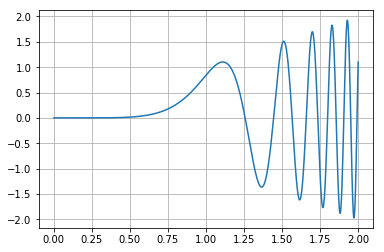

In [126]:
x=np.linspace(0,2,1000)
plt.plot(x,g(x))
plt.grid()

Si on calcule brutalement par la méthode de Gauss-Legendre d'ordre 5 l'intégrale sur [0,5], cela donne une valeur

In [151]:
print("I= ",integ2(0,2,weights,xroot,g))

I=  1.0297953418913777


mais la vraie valeur est de 0.239667... Donc on fait une grossière erreure !!!

On a deux possibilités:
1. soit on augmente l'ordre de la quadrature, mais cela implique de recalculer  les poids et les racines d'un nouveau polynôme de Legendre;
2. soit on découpe l'intervalle [0,2] en sous-intervalle sur lesquels on applique la formule d'intégrale avec GL d'ordre 5, et on somme l'ensemble des intégrales. 

La méthode (2) est générale, et s'écrit pour $P$ sous-intervales notés $[b_p, b_{p+1}\ ]$:
$$
\int_a^b f(x) dx = \sum_{p=0}^{P-1}\  \int_{b_p}^{b_{p+1}}\ f(x) dx
$$

In [152]:
def integ2b(a,b,P,W,X,f):
    res = 0 # le résultat final 
    # decoupage de [a,b] en P intervalles (attention a linspace)
    bounds = np.linspace(a,b,P+1,endpoint=True)
    for i in range(P):
        # determination des bornes [blow, bhigh]
        blow   = bounds[i]
        bhigh  = bounds[i+1]
        # appel à al méthode de GL sur [blow, bhigh]
        res += integ2(blow,bhigh,W,X,f)
    # retour du resultat
    return res

Voyons comment converge l'approximation de l'intégrale avec le nombre P de sous-intervalles.

In [165]:
for p in range(0,50,5):
    print("n={0:5d}, GL-5 App={1:.6f}".format(p,integ2b(0,2,p,weights,xroot,g)))

n=    0, GL-5 App=0.000000
n=    5, GL-5 App=0.329410
n=   10, GL-5 App=0.229167
n=   15, GL-5 App=0.239929
n=   20, GL-5 App=0.239698
n=   25, GL-5 App=0.239668
n=   30, GL-5 App=0.239667
n=   35, GL-5 App=0.239667
n=   40, GL-5 App=0.239667
n=   45, GL-5 App=0.239667


Il faut donc 30 sous-intervalles (d'égale longueur) évalués avec 5 pts pour obtenir la valeur "exacte" de l'intégrale. Cela fait donc 150 pts d'évaluation.
En comparaison, la méthode des trapèzes requière 10,000 pts d'évaluation comme on le montre dans ce qui suit:

In [166]:
nNodes = np.logspace(1,4,10,dtype=int) 
for n in nNodes:
    a1 = integ1(0,2,n,g)
    print("n={0:5d}, Trap. App={1:.6f} ".format(n,a1))

n=   10, Trap. App=0.003200 
n=   21, Trap. App=0.442186 
n=   46, Trap. App=0.267356 
n=  100, Trap. App=0.244350 
n=  215, Trap. App=0.240643 
n=  464, Trap. App=0.239875 
n= 1000, Trap. App=0.239711 
n= 2154, Trap. App=0.239676 
n= 4641, Trap. App=0.239669 
n=10000, Trap. App=0.239667 


# Conclusion & Discussion
Tu as donc mis en oeuvre aux termes de ces 3 notebooks, une méthode efficace et largement utilisée en pratique, d'intégration numérique par la méthode de Gauss-Legendre d'ordre 5. Cependant, on peut se poser les questions qui seraient autant de piste de réflexion:
1. La fonction  $g(x)$ sur l'intervalle [0, 1.25], n'oscille pas vraiment, alors que plus $x$ augmente plus la fréquence d'oscillation augmente. On peut se demander s'il est bien pertinent de partager en sous-intervalles d'égale longueur l'intervalle [0,2]. N'est-il pas plus judicieux de mettre en place un algorithme qui "adapte" la taille des sous-intervalles?
2. une autre question qui est reliè à la précédente: peut-on calculer pour $n$ fixer (ici l'ordre de la quadrature de Gauss-Legendre) l'erreur que l'on commet à évaluer l'intégrale sur [a,b]? Il existe des variantes de la méthode Gauss-Legendre qui donne la possibilité d'utiliser une partie des points/noeuds pour obtenir une estimation de l'intégrale (certes de moins bonne qualité) qui permet d'obtenir ainsi 2 estimations de l'integrale et d'en déduire, par différence, une erreur sur l'intégrale.

En répondant à la question (2) on peut mettre en place un algorithme qui répond à la question (1) par exemple, en coupant itérativement en 2 le sous-intervale qui a la plus grande erreur. Ce type d'algorithme est à l'oeuvre dans Mathematica, mais pas dans les fonctions *quad* et *quadrature* de la librairie **scipy**. Mais cette dernière est très utile cependant. On l'utilise selon

In [167]:
from scipy import integrate

In [173]:
integ, err = integrate.quad(g, 0.0, 2.0,epsabs=1e-6)

In [174]:
print("integrale = ",integ," +/- ", err)

integrale =  0.2396666394996771  +/-  6.455738334187888e-08
